# Working with Data: Movie Review Classification

This program trains a classifier on movie reviews and predicts sentiment. 
Input: -> "movie review text"
Output: -> "positive review" OR "negative review" 

We'll use this example to get familiar with how we use data to build a machine learning model.
Try exploring how modifying the training and test data sets affects the behavior of the  classifier.

Data from: http://www.nltk.org/nltk_data/

Example based on: http://scikit-learn.org/dev/tutorial/text_analytics/working_with_text_data.html

In [ ]:
import sklearn
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import nltk

### Import Training Data

In [ ]:
# Path to the training data
### (TODO #3: change this path to '../data/movie_reviews_custom' to use your own data)
moviedir = r'../data/movie_reviews'
# loading all files as training data. 
movie_train = load_files(moviedir, shuffle=True)
print("Loaded " + str(len(movie_train.data)) + " training examples")

In [ ]:
###### Optional:
# Make sure that the data is loaded correctly

print("Inspecting data: \n")
# target names ("classes") are automatically generated from subfolder names
print("Target names: " + str(movie_train.target_names) + "\n")
# First file seems to be about a Schwarzenegger movie. 
print("First line: " + movie_train.data[0][:500] + "\n")
# first file is in "neg" folder
print("First file: " + movie_train.filenames[0] + "\n")
# first file is a negative review and is mapped to 0 index 'neg' in target_names
print("First file mapped to class: " + str(movie_train.target[0]) + "\n")

### Format Training Data

In [ ]:
# initialize movie_vector object, and then turn movie train data into a vector 
movie_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, decode_error='replace')         # use all 25K words. 82.2% acc.
# movie_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, max_features = 3000) # use top 3000 words only. 78.5% acc.
movie_counts = movie_vec.fit_transform(movie_train.data)

In [ ]:
# If the above breaks, uncomment and run the following line to fix the missing packages
# nltk.download('punkt')
# or, download manually from http://nltk.org/nltk_data/

In [ ]:
###### Optional:
# Examine formatted training data, what does it look like now?

# 'screen' is found in the corpus, mapped to index 19637
print("index of word 'screen' " + str(movie_vec.vocabulary_.get('screen')))
# huge dimensions! 2,000 documents, 25K unique terms. 
print("dimensions: " + str(movie_counts.shape))

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Convert raw frequency counts into TF-IDF values
tfidf_transformer = TfidfTransformer()
movie_tfidf = tfidf_transformer.fit_transform(movie_counts)


# Same dimensions, now with tf-idf values instead of raw frequency counts
print(movie_tfidf.shape)

### Training and testing a Naive Bayes classifier

In [ ]:
# Now ready to build a classifier. 
# We will use Multinominal Naive Bayes as our model
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Split data into training and test sets
# from sklearn.cross_validation import train_test_split  # deprecated in 0.18
from sklearn.model_selection import train_test_split
docs_train, docs_test, y_train, y_test = train_test_split(
    movie_tfidf, movie_train.target, test_size = 0.20, random_state = 12)

In [ ]:
# Train a Multimoda Naive Bayes classifier
clf = MultinomialNB().fit(docs_train, y_train)

In [ ]:
# Predicting the Test set results, find accuracy
y_pred = clf.predict(docs_test)
print("Accuracy: ")
print(sklearn.metrics.accuracy_score(y_test, y_pred))

### Confusion Matrix

To get a more detailed understanding of how our classifier performed we can use a confusion matrix. This is a 2 x 2 grid that lays out the number of predicted true positives, false positives, false negatives, and true negatives. 

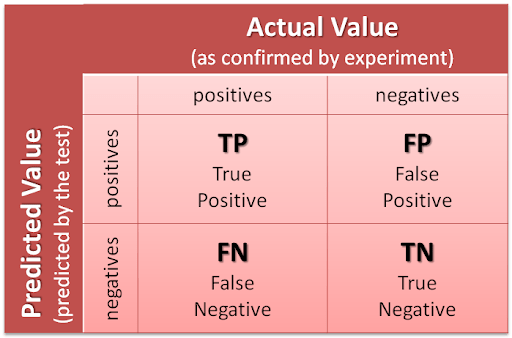

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

### Try the classifier on your own data


In [ ]:
# very short and fake movie reviews
### (TODO #1)
reviews_new = ['This movie was excellent', 'Absolute joy ride', 
            'The acting was terrible', 'Tom Hardy shined through.', 
              'This was certainly a movie', 'Two thumbs up', 'I fell asleep halfway through', 
              "We can't wait for the sequel!!", '!', '?', 'I cannot recommend this highly enough', 
              'instant classic.', 'Simon Abkarian was amazing. His performance was Oscar-worthy.']
reviews_new_counts = movie_vec.transform(reviews_new)
reviews_new_tfidf = tfidf_transformer.transform(reviews_new_counts)

In [ ]:
# have classifier make a prediction
pred = clf.predict(reviews_new_tfidf)

In [ ]:
# print out results
for review, category in zip(reviews_new, pred):
    print('%r => %s' % (review, movie_train.target_names[category]))

## TODO: 

### Understand how the training data affects the classifier

1. Change reviews_new to test your own custom movie reviews. Run the classifier, do the results look accurate? 
2. Look at the training data (found at the path: ../data/movie_reviews), make sure you understand what's happening. 
3. Change the training data path to '../data/movie_reviews_custom' to use your own custom data
4. Initially, this new folder ('../data/movie_reviews_custom') is just a copy of the original data. Try modifying the training data, retraining the classifier, and testing it. As your training data changes, how do your results change? Write down your results and be ready to share what you’ve found with the rest of the class.

A few examples of things to try are:
- Only provide a very small number of training examples
- Only provide duplicates or near identical copies of of one training example
- Add positive reviews to the neg folder
- Write your own reviews from scratch


YOUR NOTES:






### Repurpose the model

One advantage of machine learning models is their flexibility. Just by training on different data, the exact same model can be used to solve many different types of problems. To see that in action, let’s repurpose this classifier to do something entirely different. 

Your task: 
Come up with a new problem that fits the template below (which this model uses):

- Input: (Text)
- Output: (Option A, Option B)  -> where A and B can be anything, e.g. pos, neg

Now, by ONLY changing the data in '../data/movie_reviews_custom' and retraining the classifier, repurpose this model to do something entirely different.   

BE CREATIVE! Share ideas and really have fun with this. 

If you’re not sure what to try, some ideas include: 
- An email spam classifier
- Language classification 
- Topic classification
- Restaurant reviews 

YOUR NOTES:




